# Credit Card Fraud Detection Project
This notebook follows the steps required by the Intellipaat project for detecting credit card fraud.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [1]:
# Load dataset
from google.colab import files
upload = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
import pandas as pd
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Missing Value Analysis

In [4]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


## Genuine vs Fraudulent Transactions

In [5]:
genuine_count = data[data['Class'] == 0].shape[0]
fraud_count = data[data['Class'] == 1].shape[0]
fraud_percentage = (fraud_count / len(data)) * 100

print(f"Genuine Transactions: {genuine_count}")
print(f"Fraud Transactions: {fraud_count}")
print(f"Fraud Percentage: {fraud_percentage:.4f}%")

Genuine Transactions: 284315
Fraud Transactions: 492
Fraud Percentage: 0.1727%


## Visualize Transactions

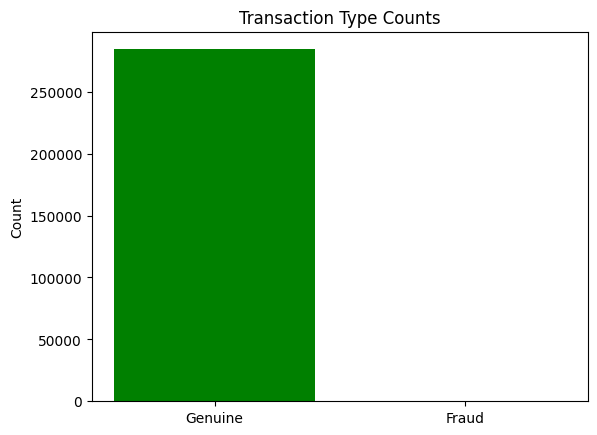

In [6]:
plt.bar(['Genuine', 'Fraud'], [genuine_count, fraud_count], color=['green', 'red'])
plt.title('Transaction Type Counts')
plt.ylabel('Count')
plt.show()

## Normalize Amount Column

In [7]:
data['NormalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data.drop(['Amount'], axis=1, inplace=True)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## Train-Test Split (70:30)

In [8]:
X = data.drop(['Class'], axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Train Decision Tree and Random Forest Models

In [9]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predict and Evaluate Models

In [12]:
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

dt_accuracy = dt_model.score(X_test, y_test)
rf_accuracy = rf_model.score(X_test, y_test)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Decision Tree Accuracy: 0.9992
Random Forest Accuracy: 0.9995


## Performance Metrics

In [13]:
print("Decision Tree Classification Report")
print(classification_report(y_test, dt_preds))

print("Random Forest Classification Report")
print(classification_report(y_test, rf_preds))

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.74      0.76       148

    accuracy                           1.00     85443
   macro avg       0.89      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

